In [ ]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified
!pip install louvain
!pip install scvelo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 89.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [ ]:

import scanpy as sc
import anndata as ad
import numpy as np

In [ ]:
!wget https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5

--2025-12-14 10:25:48--  https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.1.173, 104.18.0.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.1.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65402953 (62M) [application/x-hdf5]
Saving to: ‘10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5’

10k_5p_Human_diseas 100%[===================>]  62.37M   199MB/s    in 0.3s    

2025-12-14 10:25:49 (199 MB/s) - ‘10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5’ saved [65402953/65402953]



In [ ]:
adata = sc.read_10x_h5('/content/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5')
adata.shape

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1798: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:1798: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


(13853, 38606)

In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 13853 × 38606
    var: 'gene_ids', 'feature_types', 'genome'


In [ ]:
adata.obs.head()

""
AAACCAAAGAACAGAC-1
AAACCAAAGCAAGATA-1
AAACCAAAGCTGGTTA-1
AAACCAGCACCTAACG-1
AAACCAGCACGCGTTA-1


In [ ]:
adata.var.head()

,gene_ids,feature_types,genome
DDX11L2,ENSG00000290825,Gene Expression,GRCh38
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
ENSG00000290826,ENSG00000290826,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38


In [ ]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [ ]:
adata.var['MT'] = adata.var_names.str.startswith("MT-")

In [ ]:
mt_genes = adata.var[adata.var["MT"]]
mt_genes

,gene_ids,feature_types,genome,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MT-ND1,ENSG00000198888,Gene Expression,GRCh38,True,False,False,13614,22.450949,3.154911,1.725258,311013.0,12.647593
MT-ND2,ENSG00000198763,Gene Expression,GRCh38,True,False,False,13620,22.201978,3.144238,1.681946,307564.0,12.636442
MT-CO1,ENSG00000198804,Gene Expression,GRCh38,True,False,False,13546,117.312351,4.773328,2.216126,1625128.0,14.301098
MT-CO2,ENSG00000198712,Gene Expression,GRCh38,True,False,False,13645,70.486970,4.269515,1.501480,976456.0,13.791686
MT-ATP8,ENSG00000228253,Gene Expression,GRCh38,True,False,False,13303,11.729445,2.543918,3.970259,162488.0,11.998365
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38,True,False,False,13600,30.819534,3.460080,1.826319,426943.0,12.964408
MT-CO3,ENSG00000198938,Gene Expression,GRCh38,True,False,False,13657,60.813614,4.124124,1.414856,842451.0,13.644072
MT-ND3,ENSG00000198840,Gene Expression,GRCh38,True,False,False,13507,23.107702,3.182531,2.497654,320111.0,12.676426
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,False,False,13523,36.689814,3.629390,2.382155,508264.0,13.138759
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,False,False,13637,24.036526,3.220336,1.559229,332978.0,12.715835


In [ ]:
adata.var["RIBO"] = adata.var_names.str.startswith('RPS', 'RPL')

In [ ]:
adata.var["HB"] = adata.var_names.str.startswith('HB')

In [ ]:
hb_genes = adata.var[adata.var["HB"]]
hb_genes

,gene_ids,feature_types,genome,MT,RIBO,HB
HBEGF,ENSG00000113070,Gene Expression,GRCh38,False,False,True
HBS1L,ENSG00000112339,Gene Expression,GRCh38,False,False,True
HBP1,ENSG00000105856,Gene Expression,GRCh38,False,False,True
HBB,ENSG00000244734,Gene Expression,GRCh38,False,False,True
HBD,ENSG00000223609,Gene Expression,GRCh38,False,False,True
HBG1,ENSG00000213934,Gene Expression,GRCh38,False,False,True
HBG2,ENSG00000196565,Gene Expression,GRCh38,False,False,True
HBE1,ENSG00000213931,Gene Expression,GRCh38,False,False,True
HBZ,ENSG00000130656,Gene Expression,GRCh38,False,False,True
HBM,ENSG00000206177,Gene Expression,GRCh38,False,False,True


In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['MT', 'RIBO', 'HB'], inplace=True, log1p= True)

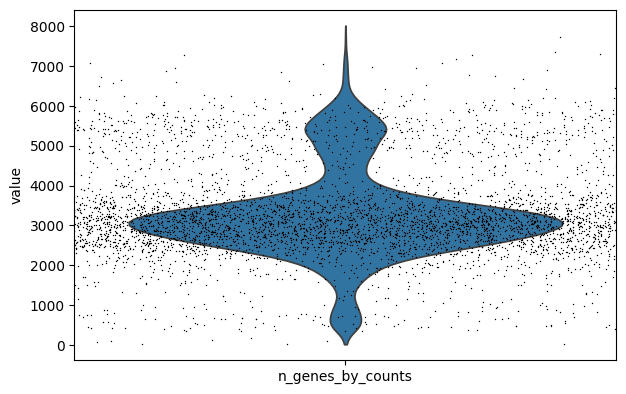

In [ ]:
sc.pl.violin(adata, "n_genes_by_counts", jitter = 1.5, multi_panel= False)

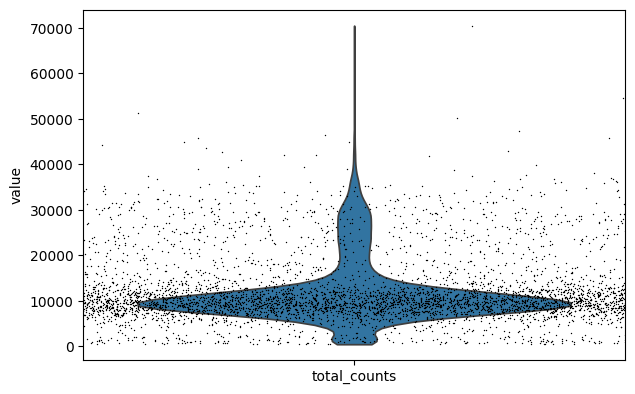

In [ ]:
sc.pl.violin(adata, "total_counts", jitter = 1.5, multi_panel= False)

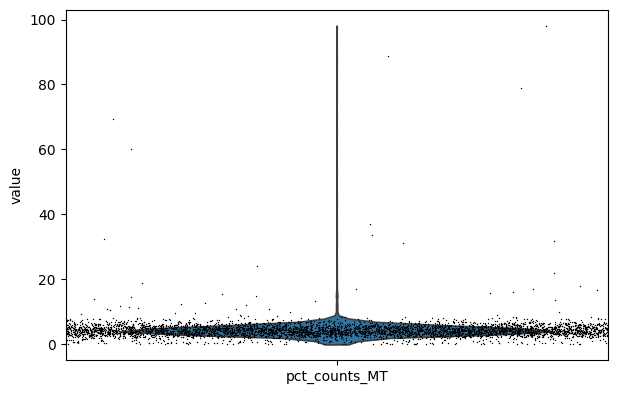

In [ ]:
sc.pl.violin(adata, "pct_counts_MT", jitter = 1.5, multi_panel= False)

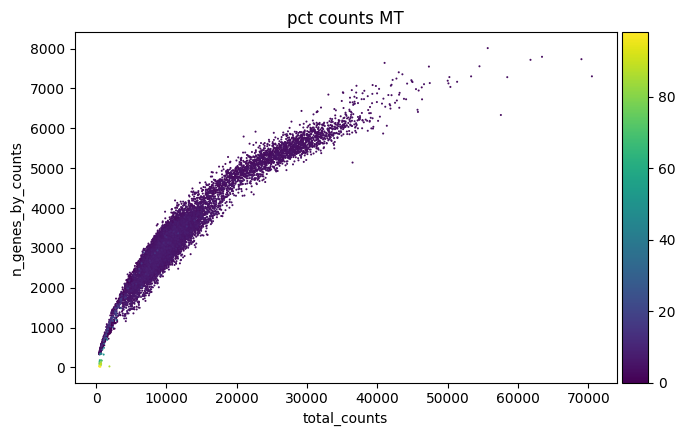

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts",color = "pct_counts_MT")

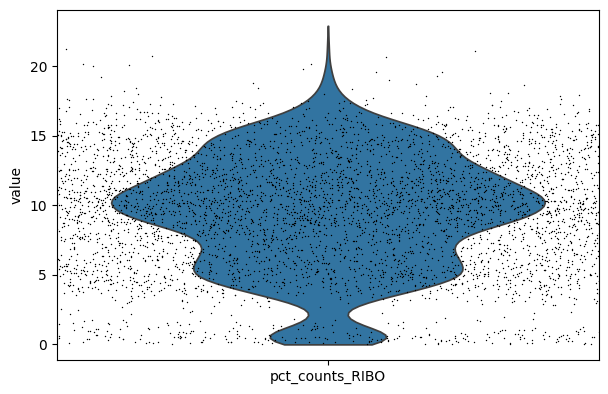

In [ ]:
sc.pl.violin(adata, "pct_counts_RIBO", jitter = 1.5, multi_panel= False)

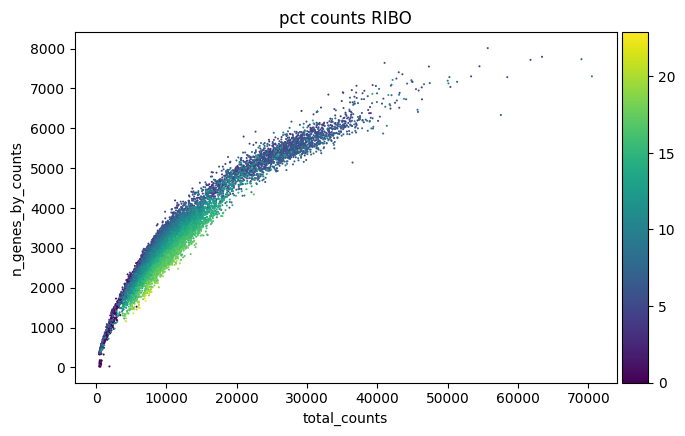

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts",color = "pct_counts_RIBO")

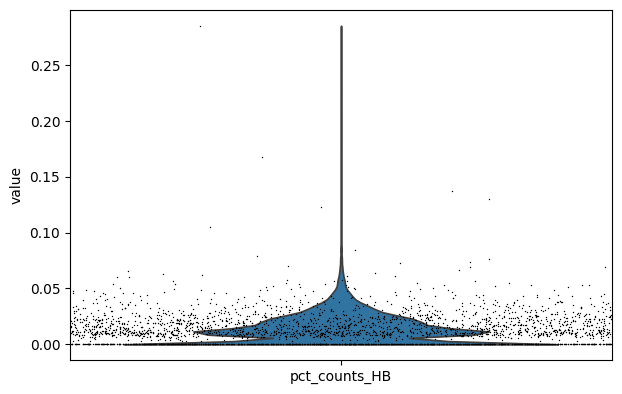

In [ ]:
sc.pl.violin(adata, "pct_counts_HB", jitter = 2.5, multi_panel= False)

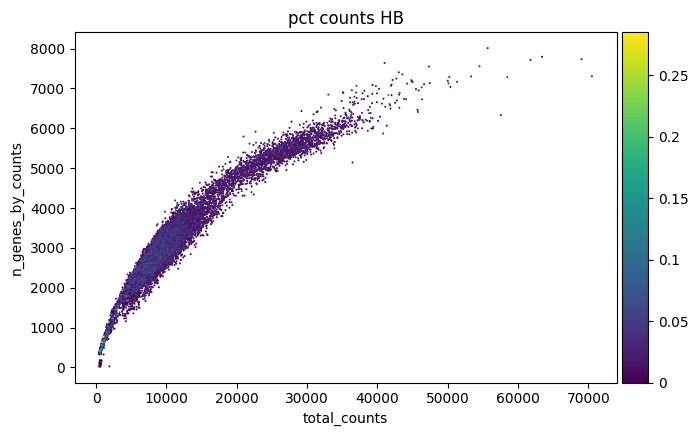

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts",color = "pct_counts_HB")

In [ ]:
adata = adata[adata.obs["pct_counts_MT"]<10, :]

In [ ]:
adata = adata[adata.obs["pct_counts_RIBO"]<10, :]

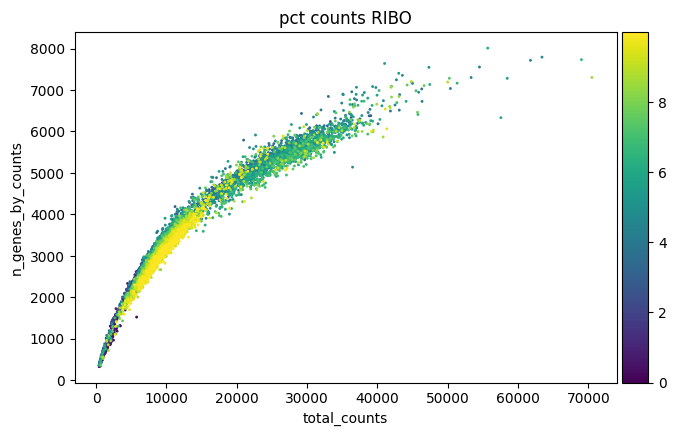

In [ ]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts",color = "pct_counts_RIBO")

normalization


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

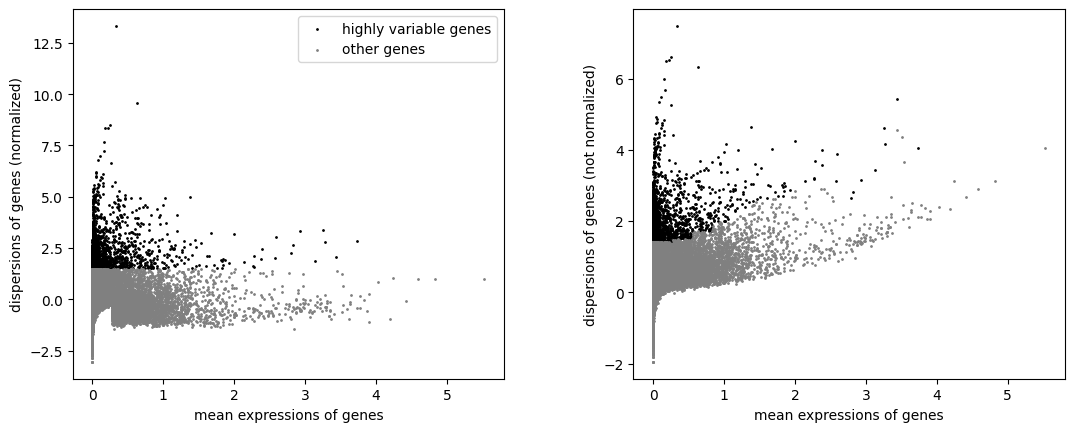

In [ ]:
sc.pl.highly_variable_genes(adata)

Dimensionality reduction

In [ ]:
sc.tl.pca(adata, n_comps=100)

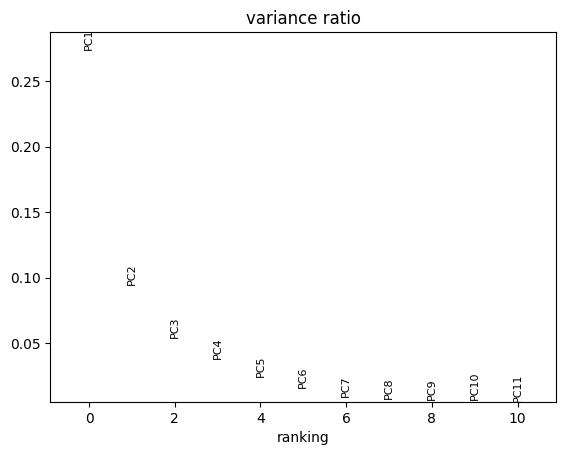

In [ ]:
sc.pl.pca_variance_ratio(adata, n_pcs=10)

In [ ]:
sc.pp.neighbors(adata)

In [ ]:
sc.tl.umap(adata, min_dist=0.5)


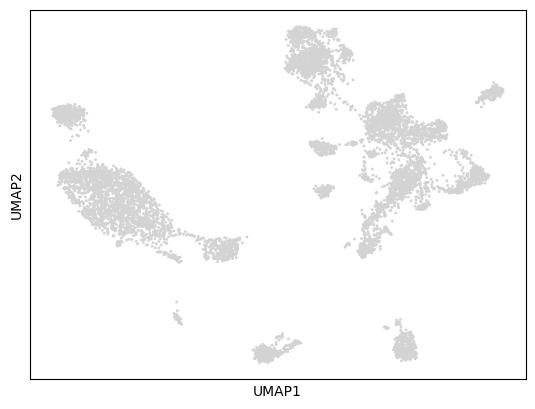

In [ ]:
sc.pl.umap(adata)

In [ ]:
sc.tl.leiden(adata, resolution=0.5)

/tmp/ipython-input-1771924308.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


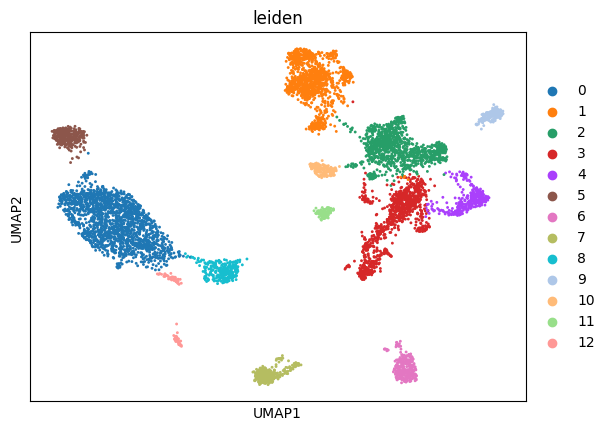

In [ ]:
sc.pl.umap(adata, color=["leiden"])

In [ ]:
sc.tl.leiden(adata, resolution=0.25)

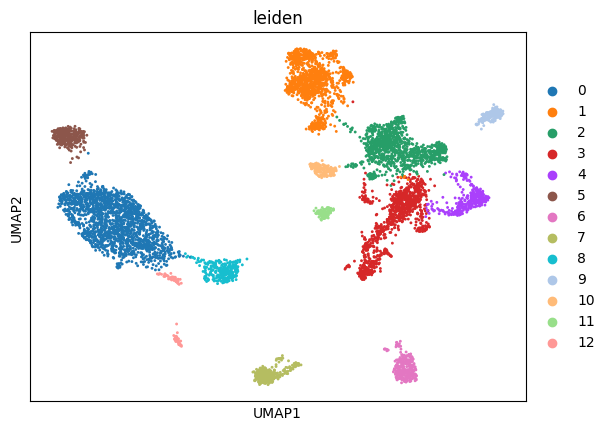

In [ ]:
sc.pl.umap(adata, color=["leiden"])

cell annotation

In [ ]:
import decoupler as dc

In [ ]:
markers = dc.op.resource(name= "PanglaoDB", organism= "human")
markers= markers[markers["canonical_marker"]]
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]
markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]
markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [ ]:
dc.mt.ulm(adata, net = markers, tmin = 3)

In [ ]:
score = dc.pp.get_obsm(adata, key = "score_ulm")
score

AnnData object with n_obs × n_vars = 7093 × 142
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB', 'log1p_total_counts_HB', 'pct_counts_HB', 'leiden'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'score_ulm', 'padj_ulm'

In [ ]:
adata.obsm["score_ulm"].head()

,Acinar cells,Adipocyte progenitor cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,Astrocytes,B cells,...,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trichocytes,Trophoblast cells,Tuft cells,Urothelial cells
AAACCAAAGAACAGAC-1,-1.548994,-0.721963,-1.050285,-0.790887,-0.139170,-1.260602,3.305905,-0.913274,1.070696,2.906613,...,4.075581,4.512645,0.860591,-0.712702,-0.594438,6.702259,-0.559208,-0.721963,2.629956,-0.536869
AAACCAGCACCTAACG-1,-1.486184,-0.692690,-1.942973,-0.758819,-0.979709,0.604458,2.712660,-0.876243,1.873671,2.478363,...,3.928817,4.324583,-1.117106,-1.314625,-0.539549,5.779563,-0.536534,2.135699,3.297528,-1.027547
AAACCATTCCATTCTA-1,-1.486467,-0.692822,-1.658812,-0.758963,-0.979895,0.866392,2.198720,-0.876410,0.506440,2.432365,...,2.563281,3.785830,-0.591380,-1.314875,-0.765520,4.669896,-0.536636,0.629575,2.616669,-0.456013
AAACCATTCGGTGGTT-1,-0.217276,-0.650441,0.917826,-0.712536,-0.919952,-0.149742,-0.769642,-0.822798,1.199530,1.294974,...,1.651199,1.931439,2.782386,-0.690811,0.035570,1.317419,-0.503809,-0.650441,1.609980,-0.964873
AAACCCATCACGACAC-1,1.851394,-0.855452,2.182090,-0.937120,-1.209917,0.779336,3.555369,-1.082138,0.388151,5.008696,...,1.624740,3.730050,0.172500,1.092390,-0.149544,2.112432,-0.662603,-0.152217,3.745619,-1.268998


In [ ]:
adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocyte progenitor cells', 'Adipocytes',
       'Adrenergic neurons', 'Airway goblet cells', 'Alpha cells',
       'Alveolar macrophages', 'Anterior pituitary gland cells', 'Astrocytes',
       'B cells',
       ...
       'T helper cells', 'T memory cells', 'T regulatory cells', 'Tanycytes',
       'Taste receptor cells', 'Thymocytes', 'Trichocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=142)

In [ ]:
#rank genes for 0.05 resolutin
adata_rank = dc.tl.rankby_group(score, groupby="leiden", reference="rest", method="t-test_overestim_var")
adata_rank = adata_rank[adata_rank["stat"] > 0]
adata_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,11,rest,Gamma delta T cells,11.604530,8.739807,1.168305e-20,1.658993e-18
1,11,rest,NK cells,10.725796,8.813816,1.405450e-18,9.978696e-17
2,11,rest,T cells,8.629372,6.271596,6.925877e-14,3.278248e-12
8,11,rest,Thymocytes,6.964447,1.658458,1.371733e-10,2.164290e-09
11,11,rest,Bergmann glia,6.281878,0.730985,2.351739e-09,2.782891e-08


In [ ]:
cluster_annotations = adata_rank[adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


/tmp/ipython-input-3250847988.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = adata_rank[adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [ ]:
cluster_annotations

{'11': 'Gamma delta T cells',
 '9': 'NK cells',
 '2': 'T cells',
 '6': 'Basophils',
 '0': 'Acinar cells',
 '1': 'Natural killer T cells',
 '4': 'Thymocytes',
 '3': 'Thymocytes',
 '12': 'Enteroendocrine cells',
 '5': 'Purkinje neurons',
 '10': 'NK cells',
 '7': 'B cells',
 '8': 'Red pulp macrophages'}

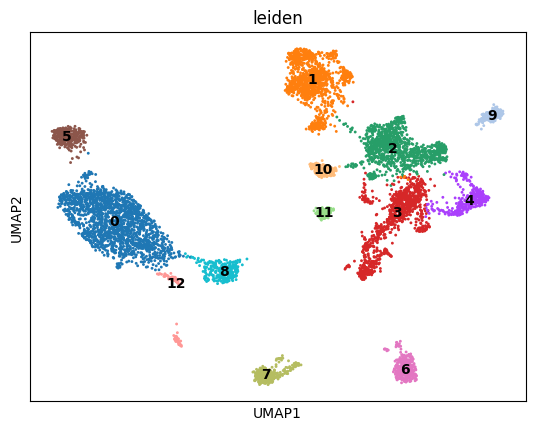

In [ ]:
sc.pl.umap(adata, color=["leiden"], legend_loc="on data",  ncols=1)